In [1]:
import numpy as np
import matplotlib.pyplot as plt
import bdtcode.histogramming as H
import glob

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
# This npz files are made by running npz_saver.ipynb code
# the original npz files have these selection cuts:
#  1- RTx < 1.15 --> this should be changed to RTx < 1.005 ( slide# )
#  1- no lepton veto

In [4]:
# Loading MC npz files

#qcd_bin = (list(np.load('npzfiles/qcd_bin'+str(n) +'.npz') for n in range(0,9)))
qcd_bin = (list(np.load('qcd_bin'+str(n) +'.npz') for n in range(0,9)))
ttjet_bin = (list(np.load('npzfiles/ttjet_bin'+str(n) +'.npz') for n in range(0,8)))
wjet_bin  = (list(np.load('npzfiles/wjet_bin'+str(n) +'.npz') for n in range(0,5)))
zjet_bin  = (list(np.load('npzfiles/zjet_bin'+str(n) +'.npz') for n in range(0,5)))


# Loading data_prehem npz files
data_prehem = (list(np.load('npzfiles/data_prehem_run'+str(n) +'.npz') for n in ('A','B')))


In [5]:
# Computing weights
# Computing MC weights:
#  1-preselection efficiencies 

qcd_sel_eff = (list(qcd_bin[n]['preselection']/qcd_bin[n]['total'] for n in range(0,9)))
ttjet_sel_eff = (list(ttjet_bin[n]['preselection']/ttjet_bin[n]['total'] for n in range(0,8)))
wjet_sel_eff = (list(wjet_bin[n]['preselection']/wjet_bin[n]['total'] for n in range(0,5)))
zjet_sel_eff = (list(zjet_bin[n]['preselection']/zjet_bin[n]['total'] for n in range(0,5)))

#  2-number of events passing from preselection efficiencies
qcd_pass   = (list(qcd_bin[n]['preselection'] for n in range(0,9)))
ttjet_pass = (list(ttjet_bin[n]['preselection'] for n in range(0,8)))
wjet_pass  = (list(wjet_bin[n]['preselection'] for n in range(0,5)))
zjet_pass  = (list(zjet_bin[n]['preselection'] for n in range(0,5)))

#  3-Compute data_prehem luminosity to weight MC
#    lumi runA + runB ( from https://twiki.cern.ch/twiki/bin/viewauth/CMS/
#    RA2b13TeVProduction#Dataset_luminosities_2018_pb_1)
prehem_lumi = 14026.948 + 7044.413 

#  5-MC XSec
qcd_crossections = np.array([7823, 648, 186.9, 32.293, 9.4183, 0.84265, 0.114943, 0.00682981, 0.000165445])#reference: SVJ AN note
ttjet_crossections = np.array([88.34, 182.72, 182.72, 831.76, 2.685, 1.096, 0.194, 0.002]) #reference: https://github.com/boostedsvj/svj-bdt/blob/merged/bdtcode/crosssections.py
zjet_crossections = np.array([9.921*1.1347, 2.409*1.1347, 1.078*1.1347, 0.2514*1.1347, 0.005614*1.1347])#reference: https://github.com/boostedsvj/svj-bdt/blob/merged/bdtcode/crosssections.py
wjet_crossections = np.array([45.25*1.139, 10.97*1.139, 4.933*1.139, 1.16*1.139, 0.02627*1.139])#reference: https://github.com/boostedsvj/svj-bdt/blob/merged/bdtcode/crosssections.py

#  6-Compute weight
qcd_weight   = qcd_crossections   *qcd_sel_eff   * prehem_lumi / qcd_pass
ttjet_weight = ttjet_crossections *ttjet_sel_eff * prehem_lumi / ttjet_pass
wjet_weight  = wjet_crossections  *wjet_sel_eff  * prehem_lumi / wjet_pass
zjet_weight  = zjet_crossections  *zjet_sel_eff  * prehem_lumi / zjet_pass

# Computing data_prehem weights
run_lumi = np.array([14026.948, 7044.413])
data_weight = run_lumi / prehem_lumi

In [6]:
# add data_prehem 2018 runA, B
# compute centre of bins 

bins = np.linspace(0, 4000, 100)

data_pt_values =   [data_prehem[n]['pt'] for n in range(0,2)]
data_labels = ['Run2018A', 'Run2018B']
data_weights_arr   = [np.ones_like(data_prehem[n]['pt'])*data_weight[n] for n in range(0,2)]

val_data_pt, data_edges_pt, patches_data_pt = plt.hist(data_pt_values, bins, stacked=True, histtype='step', label=data_labels, weights=data_weights_arr)
plt.close()

data_pt_centre = (data_edges_pt[1:]+data_edges_pt[:-1])/2
data_pt_stacked = val_data_pt[1]

In [7]:
# add all MC (qcd, ttjets, wjets, zjets) npz files in one big array --> mc_pt_values
# mc_pt_values array has 4 elements, and each elements has several bins
# mc_weights_arr is the weight that should be applied on histogramming

labels_qcd=['PT300to470','PT470to600','PT600to800','PT800to1000', 'PT1000to1400', 'PT1400to1800', 'PT1800to2400', 'PT2400to3200', 'PT3200toInf']
labels_ttjet=['DiLept', 'SingleLeptFromTbar', 'SingleLeptFromT', 'TuneCP5', 'HT-600To800','HT-800To1200','HT-1200To2500', 'HT-2500ToInf']
labels_wjet=['HT-400To600','HT-600To800','HT-800To1200','HT-1200To2500', 'HT-2500ToInf']
labels_zjet=['HT-400To600','HT-600To800','HT-800To1200','HT-1200To2500', 'HT-2500ToInf']


qcd_pt_values =   [qcd_bin[n]['pt'] for n in range(0,9)]
ttjet_pt_values = [ttjet_bin[n]['pt'] for n in range(0,8)]
wjet_pt_values =  [wjet_bin[n]['pt'] for n in range(0,5)]
zjet_pt_values =  [zjet_bin[n]['pt'] for n in range(0,5)]

qcd_label    = [labels_qcd[n] for n in range(0,9)]
ttjet_label  = [labels_ttjet[n] for n in range(0,8)]
wjet_label   = [labels_wjet[n] for n in range(0,5)]
zjet_label   = [labels_zjet[n] for n in range(0,5)]

qcd_weights_arr   = [np.ones_like(qcd_bin[n]['pt'])*qcd_weight[n] for n in range(0,9)]
ttjet_weights_arr = [np.ones_like(ttjet_bin[n]['pt'])*ttjet_weight[n] for n in range(0,8)]
wjet_weights_arr  = [np.ones_like(wjet_bin[n]['pt'])*wjet_weight[n] for n in range(0,5)]
zjet_weights_arr  = [np.ones_like(zjet_bin[n]['pt'])*zjet_weight[n] for n in range(0,5)]

mc_pt_values = [qcd_pt_values, ttjet_pt_values, wjet_pt_values, zjet_pt_values]
mc_labels = [qcd_label, ttjet_label, wjet_label, zjet_label]
mc_weights_arr = [qcd_weights_arr, ttjet_weights_arr, wjet_weights_arr, zjet_weights_arr]



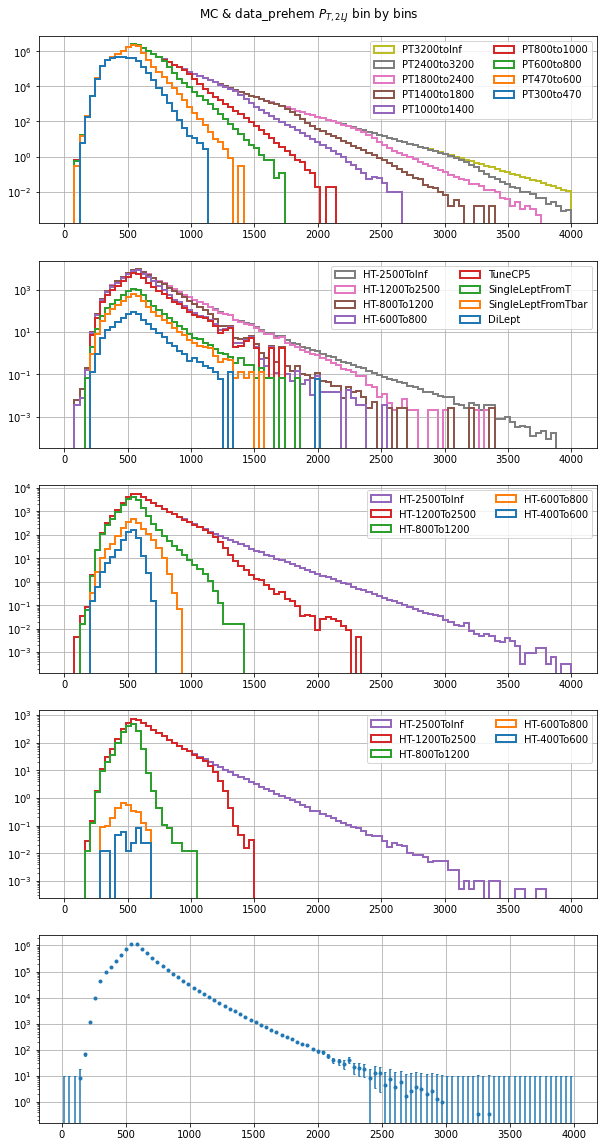

In [8]:
# plot stacked PT_2LJ histograms 
# MC (qcd, ttjets, wjets, zjets) and data 
# the peak in MC sources and data is in PT~500 (GeV)

fig, ax = plt.subplots(5, 1, figsize=(10,20))
fig.suptitle('MC & data_prehem $P_{T,2LJ}$ bin by bins', y=0.9)
bins = np.linspace(0, 4000, 100)

for i in range(0,4):
    ax[i].hist(mc_pt_values[i], bins, stacked=True, histtype = 'step', label = mc_labels[i], weights = mc_weights_arr[i], linewidth=2)
    ax[i].set_yscale('log')
    ax[i].grid(True)
    ax[i].legend(ncol=2)

ax[4].errorbar(x=data_pt_centre, y=data_pt_stacked, yerr=np.sqrt(data_pt_stacked.size), fmt='.', capsize=1, label='data')
ax[4].set_yscale('log')
ax[4].grid(True)

fig.savefig('png/MC_pt2lj.png')

In [9]:
# Add values of MC PT histograms:
# mc_pt_stacked = qcd + ttjets + wjets + zjets 

fig = plt.figure(figsize=(10, 5))
mc_val_pt = {}
mc_edges_pt = {}
mc_patches_pt = {}


for i in range(0,4):
    mc_val_pt[i], mc_edges_pt[i], mc_patches_pt[i] = plt.hist(mc_pt_values[i], bins, stacked=True, histtype = 'step', label = mc_labels[i], weights = mc_weights_arr[i], linewidth=2)
    print(max(mc_val_pt[i][len(mc_val_pt[i])-1])) # checking the max value of stacked MC PT histograms

mc_pt_centre = (mc_edges_pt[0][1:]+mc_edges_pt[0][:-1])/2
mc_pt_stacked = np.zeros(99)
for i in range(0,4):
    mc_pt_stacked += mc_val_pt[i][len(mc_val_pt[i])-1]
    
# demo purpose
'''
plt.yscale('log')
plt.grid()
plt.ylim(0.0001,100000000)
plt.axhline(y=max(mc_pt_stacked))
'''
plt.close()
print('  ', max(mc_pt_stacked)) # checking the addition of histograms: almost equal to max of each MC

2533758.9758459944
9540.855093940874
5508.948434719742
731.5210539504516
   2549083.844925619


Text(0, 0.5, 'Data/MC')

<Figure size 720x360 with 0 Axes>

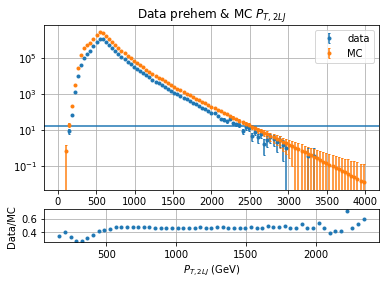

In [10]:
# PT data and MC ratio plots
# MC has more than data events --> doesn't match with the intution

fig = plt.figure(figsize=(10, 5))
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [10, 2]})



ax1.errorbar(x=data_pt_centre, y=data_pt_stacked, yerr=np.sqrt(data_pt_stacked), fmt='.', capsize=1, label='data')
ax1.errorbar(x=mc_pt_centre,   y=mc_pt_stacked,   yerr=np.sqrt(mc_pt_stacked),   fmt='.', capsize=1, label='MC')
ax1.axhline(y=15)
ax1.legend()
ax1.grid('True')
ax1.set_title('Data prehem & MC $P_{T,2LJ}$')
ax1.set_yscale('log')

ratio = np.divide(data_pt_stacked,
                  mc_pt_stacked,
                  where=(mc_pt_stacked != 0))
                  
rotio = ratio[(mc_pt_stacked!=0) & (data_pt_stacked>15)]
edges = data_edges_pt[:len(data_edges_pt)-1][(mc_pt_stacked!=0) & (data_pt_stacked>15)]

ax2.plot(edges,rotio,'.')
ax2.grid('True')
ax2.set_xlabel('$P_{T,2LJ}$ (GeV)')
ax2.set_ylabel('Data/MC')

In [11]:


# MET plots #
# Computing k-factor


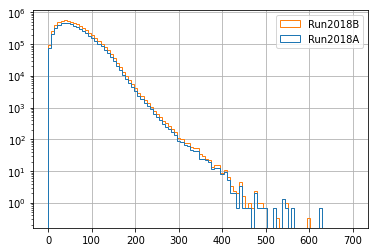

In [13]:
qcd_met_values =   [qcd_bin[n]['met'] for n in range(0,9)]
ttjet_met_values = [ttjet_bin[n]['met'] for n in range(0,8)]
wjet_met_values =  [wjet_bin[n]['met'] for n in range(0,5)]
zjet_met_values =  [zjet_bin[n]['met'] for n in range(0,5)]

mc_met_values = [qcd_met_values, ttjet_met_values, wjet_met_values, zjet_met_values]
data_met_values =   [data_prehem[n]['met'] for n in range(0,2)]
met_bins = np.linspace(0, 700, 100)

val_data_met, data_edges_met, patches_data_met = plt.hist(data_met_values, met_bins, stacked=True, histtype='step', label=data_labels, weights=data_weights_arr)
#plt.close()
plt.yscale('log')
plt.grid()
plt.legend()

data_met_centre = (data_edges_met[1:]+data_edges_met[:-1])/2
data_met_stacked = val_data_met[1]

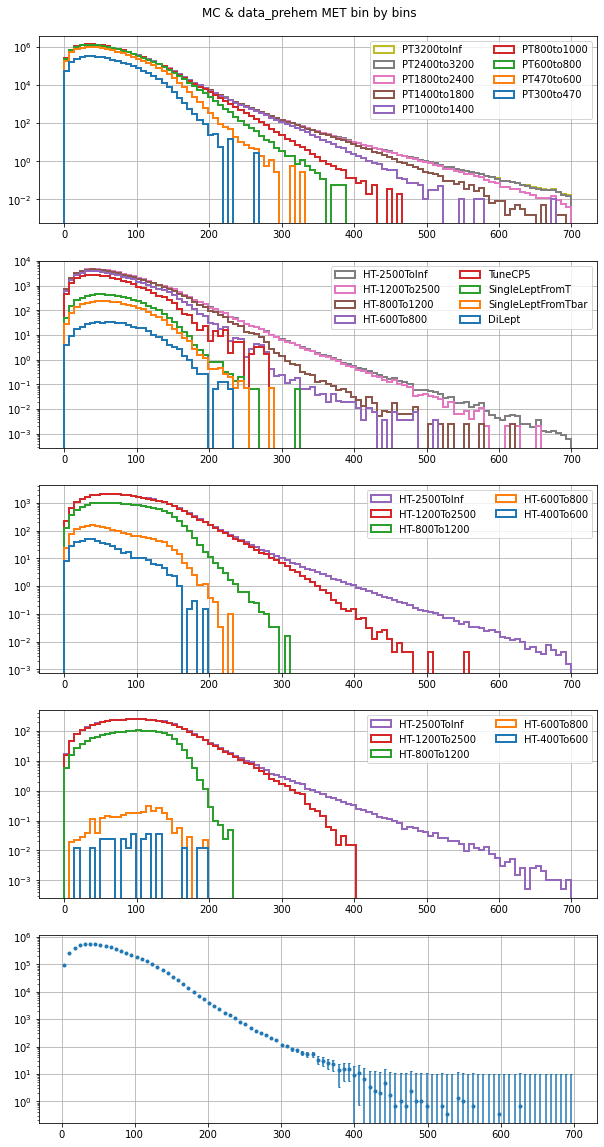

In [14]:
fig, ax = plt.subplots(5, 1, figsize=(10,20))
fig.suptitle('MC & data_prehem MET bin by bins', y=0.9)
#met_bins = np.linspace(0, 700, 100)

for i in range(0,4):
    ax[i].hist(mc_met_values[i], met_bins, stacked=True, histtype = 'step', label = mc_labels[i], weights = mc_weights_arr[i], linewidth=2)
    ax[i].set_yscale('log')
    ax[i].grid(True)
    ax[i].legend(ncol=2)

ax[4].errorbar(x=data_met_centre, y=data_met_stacked, yerr=np.sqrt(data_met_stacked.size), fmt='.', capsize=1, label='data')
ax[4].set_yscale('log')
ax[4].grid(True)

fig.savefig('png/MC_met.png')

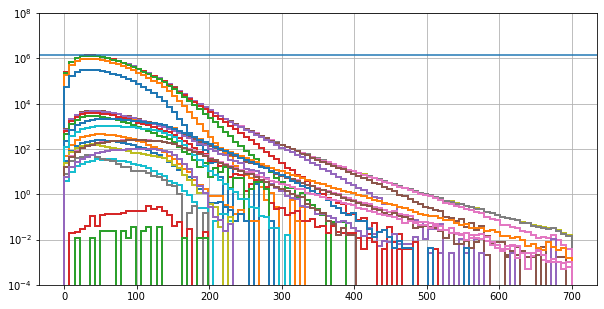

In [15]:
fig = plt.figure(figsize=(10, 5))
mc_val_met = {}
mc_edges_met = {}
mc_patches_met = {}

for i in range(0,4):
    mc_val_met[i], mc_edges_met[i], mc_patches_met[i] = plt.hist(mc_met_values[i], met_bins, stacked=True, histtype = 'step', label = mc_labels[i], weights = mc_weights_arr[i], linewidth=2)
plt.yscale('log')
plt.grid()
#plt.close()
plt.ylim(0.0001,100000000)


mc_met_centre = (mc_edges_met[0][1:]+mc_edges_met[0][:-1])/2
mc_met_stacked = mc_val_met[0][len(mc_val_met[0])-1] + mc_val_met[1][len(mc_val_met[1])-1] + mc_val_met[2][len(mc_val_met[2])-1]+mc_val_met[3][len(mc_val_met[3])-1]

plt.axhline(y=max(mc_met_stacked))

<Figure size 720x360 with 0 Axes>

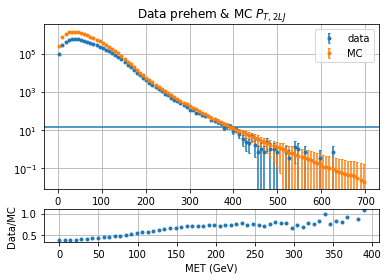

In [16]:
fig = plt.figure(figsize=(10, 5))
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [10, 2]})



ax1.errorbar(x=data_met_centre, y=data_met_stacked, yerr=np.sqrt(data_met_stacked), fmt='.', capsize=1, label='data')
ax1.errorbar(x=mc_met_centre,   y=mc_met_stacked,   yerr=np.sqrt(mc_met_stacked),   fmt='.', capsize=1, label='MC')
ax1.axhline(y=15)
ax1.legend()
ax1.grid('True')
ax1.set_title('Data prehem & MC $P_{T,2LJ}$')
ax1.set_yscale('log')

ratio = np.divide(data_met_stacked,
                  mc_met_stacked,
                  where=(mc_met_stacked != 0))
                  
rotio = ratio[(mc_met_stacked!=0) & (data_met_stacked>15)]
edges = data_edges_met[:len(data_edges_met)-1][(mc_met_stacked!=0) & (data_met_stacked>15)]

ax2.plot(edges,rotio,'.')
ax2.grid('True')
ax2.set_xlabel('MET (GeV)')
ax2.set_ylabel('Data/MC')
fig.savefig('png/MC_metRatioPlot.png')

In [17]:
r=[np.divide(data_met_stacked,
                  mc_val_met[0][8]*i*0.1 + mc_val_met[1][7] + mc_val_met[2][4] + mc_val_met[3][4],
                  where=(((mc_val_met[0][8]*i*0.05 + mc_val_met[1][7] + mc_val_met[2][4] + mc_val_met[3][4]) > 0) & (data_met_stacked>15))) for i in range(0,1000)]
print(len(r))
d_bar_prehem=[]
r_b=0
d_b=0

for i in range(0,998):
    r_b = sum(r[i])/len(r[i])
    for k in range(0,99):
        d_b += (r[i][k]-r_b)**2/len(r[i])
    d_bar_prehem.append(d_b)
    d_b=0

print(np.where(d_bar_prehem==min(d_bar_prehem)), min(d_bar_prehem))

i = np.arange(0,100, 0.1)
k_factor_prehem = i[np.where(d_bar_prehem==min(d_bar_prehem))]
print(k_factor_prehem)

1000
(array([4]),) 0.9525998559280983
[0.4]


Text(0, 0.5, 'd_bar')

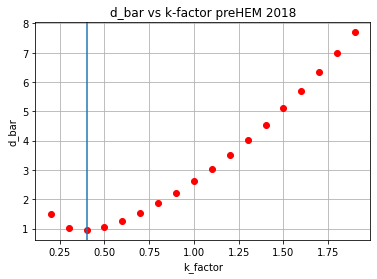

In [18]:
plt.plot(i[2:20], d_bar_prehem[2:20], 'ro')
plt.axvline(x=k_factor_prehem)
plt.grid('True')
plt.title("d_bar vs k-factor preHEM 2018")
plt.xlabel("k_factor")
plt.ylabel("d_bar")

Text(0, 0.5, 'Data/MC')

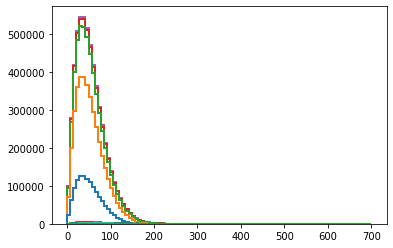

<Figure size 720x7200 with 0 Axes>

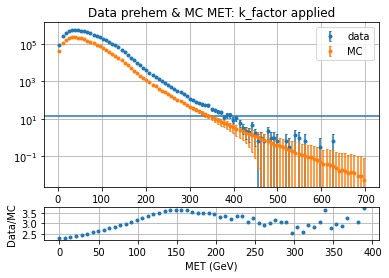

In [19]:
qcd_weights_arr_kapplied   = [np.ones_like(qcd_bin[n]['pt'])*qcd_weight[n]*k_factor_prehem for n in range(0,9)]
mc_weights_arr_kapplied = [qcd_weights_arr_kapplied, ttjet_weights_arr, wjet_weights_arr, zjet_weights_arr]


for i in range(0,4):
    mc_val_met[i], mc_edges_met[i], mc_patches_met[i] = plt.hist(mc_met_values[i], met_bins, stacked=True, histtype = 'step', label = mc_labels[i], weights = mc_weights_arr_kapplied[i], linewidth=2)


mc_met_centre = (mc_edges_met[0][1:]+mc_edges_met[0][:-1])/2
mc_met_stacked = mc_val_met[0][len(mc_val_met[0])-1]*k_factor_prehem + mc_val_met[1][len(mc_val_met[1])-1] + mc_val_met[2][len(mc_val_met[2])-1]+mc_val_met[3][len(mc_val_met[3])-1]

fig = plt.figure(figsize=(10, 100))
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [5, 1]})

ratio = np.divide(data_met_stacked,
                  mc_met_stacked,
                  where=(mc_met_stacked != 0))
                  
rotio = ratio[(mc_met_stacked !=0) & (data_met_stacked>15)]


ax1.errorbar(x=data_met_centre, y=data_met_stacked, yerr=np.sqrt(data_met_stacked), fmt='.', capsize=1, label='data')
ax1.errorbar(x=mc_met_centre, y=mc_met_stacked, yerr=np.sqrt(mc_met_stacked), fmt='.', capsize=1, label='MC')
ax1.legend()
ax1.grid('True')
ax1.set_title('Data prehem & MC MET: k_factor applied')
ax1.axhline(y=15)
ax1.set_yscale('log')
#ax1.set_xlim(0,200)

edges = data_edges_met[:len(data_edges_met)-1][(mc_met_stacked!=0) & (data_met_stacked>15)]

ax2.plot(edges,rotio,'.')
ax2.grid('True')
ax2.set_xlabel('MET (GeV)')
ax2.set_ylabel('Data/MC')
